In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

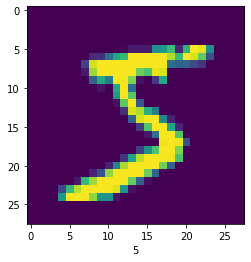

In [3]:
plt.imshow(x_train[0])
plt.xlabel(y_train[0])
plt.show()

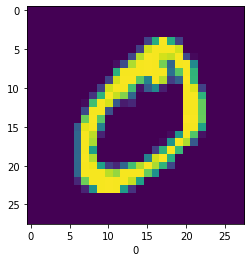

In [4]:
plt.imshow(x_train[1])
plt.xlabel(y_train[1])
plt.show()

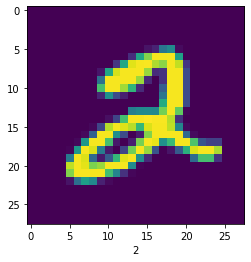

In [5]:
plt.imshow(x_train[5])
plt.xlabel(y_train[5])
plt.show()

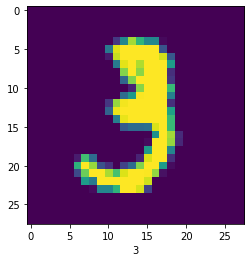

In [6]:
plt.imshow(x_train[10])
plt.xlabel(y_train[10])
plt.show()

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

x_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
x_train_scaled.shape

(60000, 28, 28)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1533 - accuracy: 0.9546
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0542 - accuracy: 0.9831
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0356 - accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0242 - accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0166 - accuracy: 0.9948


In [12]:
model.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0579 - accuracy: 0.9831


[0.05788978189229965, 0.9830999970436096]

In [13]:
y_predicted = model.predict(x_test_scaled)
y_predicted

313/313 [==============================] - 2s 6ms/step


array([[2.8921408e-04, 1.1294958e-01, 9.8992869e-02, ..., 9.9999988e-01,
        5.4958016e-03, 3.8648989e-02],
       [3.0740274e-02, 8.4797722e-01, 1.0000000e+00, ..., 2.7343419e-06,
        1.1143840e-02, 4.2596306e-03],
       [7.4650871e-04, 9.9999589e-01, 1.2150708e-02, ..., 6.2864333e-01,
        4.8412696e-01, 6.9817398e-03],
       ...,
       [2.2155728e-08, 8.9210626e-03, 5.9791262e-07, ..., 1.2774135e-01,
        9.6800953e-01, 5.6833982e-01],
       [1.5890949e-04, 1.5090421e-03, 3.2288260e-06, ..., 8.0932602e-02,
        9.9973494e-01, 6.1787614e-03],
       [4.8397210e-01, 1.0392090e-03, 6.4758020e-03, ..., 3.3561566e-05,
        2.6642767e-01, 3.5692827e-04]], dtype=float32)

In [14]:
y_pred = []
for i in y_predicted:
    y_pred.append(np.argmax(i))
y_pred[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [15]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [16]:
y_test[90:100]

array([3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=uint8)

In [17]:
y_pred[90:100]

[3, 6, 4, 3, 1, 4, 1, 7, 6, 9]

In [18]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



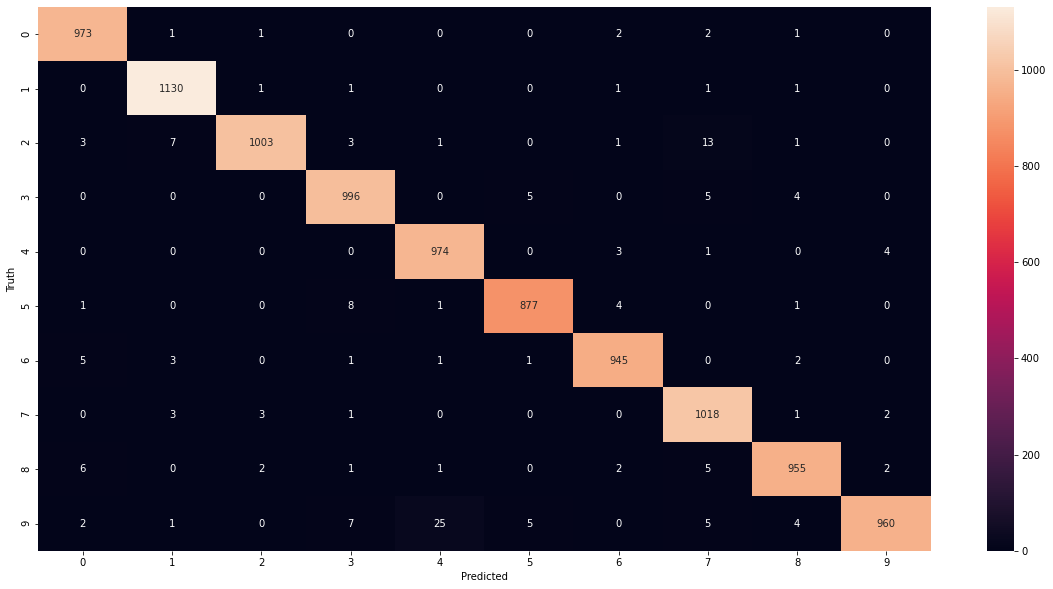

In [19]:
cm = tf.math.confusion_matrix(y_test,y_pred)
plt.figure(figsize = (20,10))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()